In [29]:
import pandas as pd
import numpy as np

In [30]:
# Load the CSV file
df = pd.read_csv("Resources/bridge_testing_dataset.csv",low_memory=False)
df2 = df.dropna()

In [31]:
# Selecting NY and CA,N DAKOTA, NEW MEXICO, FLORIDA  states
df2 = df2.loc[(df2['STATE_CODE_001'] == 36) | (df2['STATE_CODE_001'] == 6) |(df2['STATE_CODE_001'] == 38)|(df2['STATE_CODE_001'] == 35)|(df2['STATE_CODE_001'] == 12)|(df2['STATE_CODE_001'] == 8) |(df2['STATE_CODE_001'] == 29),:]
df2.head()

,OBJECTID,STATE_CODE_001,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,FEATURES_DESC_006A,MIN_VERT_CLR_010,BASE_HWY_NETWORK_012,TOLL_020,FUNCTIONAL_CLASS_026,TRAFFIC_LANES_ON_028A,TRAFFIC_LANES_UND_028B,ADT_029,DESIGN_LOAD_031,APPR_WIDTH_MT_032,DEGREES_SKEW_034,STRUCTURE_FLARED_035,RAILINGS_036A,TRANSITIONS_036B,NAVIGATION_038,NAV_VERT_CLR_MT_039,NAV_HORR_CLR_MT_040,STRUCTURE_TYPE_043B,MAIN_UNIT_SPANS_045,APPR_SPANS_046,HORR_CLR_MT_047,MAX_SPAN_LEN_MT_048,STRUCTURE_LEN_MT_049,ROADWAY_WIDTH_MT_051,DECK_WIDTH_MT_052,VERT_CLR_OVER_MT_053,VERT_CLR_UND_REF_054A,VERT_CLR_UND_054B,DECK_COND_058,SUPERSTRUCTURE_COND_059,SUBSTRUCTURE_COND_060,CHANNEL_COND_061,CULVERT_COND_062,OPERATING_RATING_064,STRUCTURAL_EVAL_067,DECK_GEOMETRY_EVAL_068,UNDCLRENCE_EVAL_069,WATERWAY_EVAL_071,APPR_ROAD_EVAL_072,IMP_LEN_MT_076,DATE_OF_INSPECT_090,INSPECT_FREQ_MONTHS_091,FRACTURE_092A,UNDWATER_LOOK_SEE_092B,SPEC_INSPECT_092C,BRIDGE_IMP_COST_094,ROADWAY_IMP_COST_095,TOTAL_IMP_COST_096,STRAHNET_HIGHWAY_100,PARALLEL_STRUCTURE_101,HIGHWAY_SYSTEM_104,DECK_STRUCTURE_TYPE_107,SURFACE_TYPE_108A,MEMBRANE_TYPE_108B,DECK_PROTECTION_108C,PERCENT_ADT_TRUCK_109,NATIONAL_NETWORK_110,PIER_PROTECTION_111,BRIDGE_LEN_IND_112,SCOUR_CRITICAL_113,FUTURE_ADT_114,MIN_NAV_CLR_MT_116,FED_AGENCY,BRIDGE_CONDITION,LOWEST_RATING,DECK_AREA,DATE,bridge_age,future_adt_estimation
39357,39358,6,1,1,road,99.99,1.0,3,1,4,0,19500,4,21.8,0,0,1,1,0,0.0,0.0,9,8,7,8.6,192.0,1093.6,17.2,18.9,99.99,R,0.49,5,7,7,9,N,58.1,7,4,3,9,6.0,0.0,522,24,Y24,Y60,N,0.0,0.0,0.0,1,N,1,1,1,0,1,29.0,1,0.0,Y,8,37258,0.0,Y,F,5,20669.04,723,16,25.0
39358,39359,6,7,0,river,99.99,0.0,3,9,1,0,75,2,3.7,0,0,0,0,0,0.0,0.0,10,1,3,3.6,39.6,67.7,3.6,4.0,99.99,N,0.00,5,6,3,5,N,27.0,3,3,N,6,3.0,0.0,518,24,Y24,Y60,Other,0.0,0.0,0.0,0,N,0,8,0,0,0,0.0,0,0.0,Y,2,156,0.0,Y,P,3,270.80,1202,89,16.0
39359,39360,6,6,6,road,99.99,0.0,3,9,2,0,200,4,10.0,0,0,0,0,N,0.0,0.0,4,1,0,13.5,10.4,10.4,13.5,17.2,99.99,N,0.00,5,4,5,6,N,44.7,4,9,N,8,8.0,10.4,721,24,N,Y60,N,208.0,108.0,316.0,0,N,0,2,6,8,8,2.0,0,1.0,Y,5,250,0.0,Y,P,4,178.88,723,75,19.0
39360,39361,6,8,0,road,99.99,0.0,3,19,2,2,100,5,7.2,0,0,1,N,N,0.0,0.0,2,5,0,7.2,18.9,60.8,7.2,10.7,99.99,H,6.40,6,7,7,N,N,81.3,7,5,3,N,6.0,60.8,721,24,N,N,N,18.0,1.0,19.0,0,N,0,1,1,N,8,20.0,0,0.0,Y,N,100,0.0,Y,F,6,650.56,723,39,22.0
39361,39362,6,6,6,canal,99.99,0.0,3,9,2,0,200,4,14.6,0,0,1,0,N,0.0,0.0,5,4,0,14.6,6.9,27.4,14.6,15.9,99.99,N,0.00,7,6,5,7,N,41.2,5,9,N,5,8.0,27.4,721,24,N,N,N,70.0,20.0,900.0,0,N,0,2,6,8,8,2.0,0,0.0,Y,5,250,0.0,Y,F,5,435.66,723,64,18.0


### Balancing BRIDGE_CONDITION data (not necessary)  

In [32]:
# # class count
# class_count_G, class_count_F, class_count_P = df2['BRIDGE_CONDITION'].value_counts()

# # Separate class
# class_G = df2[df2['BRIDGE_CONDITION'] == 'G']
# class_F = df2[df2['BRIDGE_CONDITION'] == 'F']
# class_P = df2[df2['BRIDGE_CONDITION'] == 'P']  
# print('class G:', class_G.shape)
# print('class F:', class_F.shape)
# print('class P:', class_P.shape)

# # Random Under-Sampling
# class_G_under = class_G.sample(class_count_P)
# class_F_under = class_F.sample(class_count_P)

# df2 = pd.concat([class_G_under,class_F_under, class_P], axis=0)

# print("total class of G,F and P:",df2['BRIDGE_CONDITION'].value_counts())# plot the count after under-sampeling
# df2['BRIDGE_CONDITION'].value_counts().plot(kind='bar', rot =0, title='count (target)')

In [33]:
# Select columns of object data type
object_columns = df2.select_dtypes(include=['object']).columns

# Drop object data type columns
df2_filtered = df2.drop(object_columns, axis=1)
df2_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98159 entries, 39357 to 391633
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   OBJECTID                 98159 non-null  int64  
 1   STATE_CODE_001           98159 non-null  int64  
 2   ROUTE_PREFIX_005B        98159 non-null  int64  
 3   SERVICE_LEVEL_005C       98159 non-null  int64  
 4   MIN_VERT_CLR_010         98159 non-null  float64
 5   BASE_HWY_NETWORK_012     98159 non-null  float64
 6   TOLL_020                 98159 non-null  int64  
 7   FUNCTIONAL_CLASS_026     98159 non-null  int64  
 8   TRAFFIC_LANES_ON_028A    98159 non-null  int64  
 9   TRAFFIC_LANES_UND_028B   98159 non-null  int64  
 10  ADT_029                  98159 non-null  int64  
 11  APPR_WIDTH_MT_032        98159 non-null  float64
 12  DEGREES_SKEW_034         98159 non-null  int64  
 13  STRUCTURE_FLARED_035     98159 non-null  int64  
 14  NAV_VERT_CLR_MT_039   

In [34]:
# Calculate correlation matrix
# calculate the correlation matrix of the features
corr_matrix = df2_filtered.corr()

# set the threshold for correlation value
corr_threshold = 0.77

# find the highly correlated features and drop them from the dataframe
high_corr_features = np.where(corr_matrix.abs() > corr_threshold)
high_corr_features = [(corr_matrix.columns[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_features) if x != y and x < y]
df2_filtered.drop([col[1] for col in high_corr_features], axis=1, inplace=True)

# select the remaining features with low correlation
low_corr_features = df2_filtered.columns.tolist()

# print the low correlated features
print(low_corr_features)

['OBJECTID', 'ROUTE_PREFIX_005B', 'SERVICE_LEVEL_005C', 'MIN_VERT_CLR_010', 'BASE_HWY_NETWORK_012', 'TOLL_020', 'FUNCTIONAL_CLASS_026', 'TRAFFIC_LANES_ON_028A', 'TRAFFIC_LANES_UND_028B', 'ADT_029', 'DEGREES_SKEW_034', 'STRUCTURE_FLARED_035', 'NAV_VERT_CLR_MT_039', 'NAV_HORR_CLR_MT_040', 'STRUCTURE_TYPE_043B', 'MAIN_UNIT_SPANS_045', 'APPR_SPANS_046', 'HORR_CLR_MT_047', 'MAX_SPAN_LEN_MT_048', 'STRUCTURE_LEN_MT_049', 'ROADWAY_WIDTH_MT_051', 'VERT_CLR_UND_054B', 'OPERATING_RATING_064', 'APPR_ROAD_EVAL_072', 'IMP_LEN_MT_076', 'DATE_OF_INSPECT_090', 'INSPECT_FREQ_MONTHS_091', 'BRIDGE_IMP_COST_094', 'STRAHNET_HIGHWAY_100', 'HIGHWAY_SYSTEM_104', 'PERCENT_ADT_TRUCK_109', 'NATIONAL_NETWORK_110', 'PIER_PROTECTION_111', 'MIN_NAV_CLR_MT_116', 'LOWEST_RATING', 'DATE', 'bridge_age', 'future_adt_estimation']


In [35]:
df3_filtered = df2_filtered[low_corr_features]

In [36]:
# Selecting the more important features
df3_filtered = df2[['ROUTE_PREFIX_005B', 'SERVICE_LEVEL_005C',
       'MIN_VERT_CLR_010', 'BASE_HWY_NETWORK_012', 'TOLL_020',
       'FUNCTIONAL_CLASS_026', 
       'TRAFFIC_LANES_ON_028A','TRAFFIC_LANES_UND_028B', 
       # 'ADT_029', 
       'APPR_WIDTH_MT_032',
       'DEGREES_SKEW_034', #'STRUCTURE_FLARED_035', 
       #'NAV_VERT_CLR_MT_039','NAV_HORR_CLR_MT_040', 
       'STRUCTURE_TYPE_043B', #'MAIN_UNIT_SPANS_045',
       'APPR_SPANS_046', 
       'HORR_CLR_MT_047', 
       'MAX_SPAN_LEN_MT_048','STRUCTURE_LEN_MT_049', 'ROADWAY_WIDTH_MT_051', 
       'VERT_CLR_OVER_MT_053','VERT_CLR_UND_054B', 'OPERATING_RATING_064', 
       'APPR_ROAD_EVAL_072',
       #'IMP_LEN_MT_076', 
       #'DATE_OF_INSPECT_090', 
       'INSPECT_FREQ_MONTHS_091',
       #'BRIDGE_IMP_COST_094', #'ROADWAY_IMP_COST_095', 
       #'STRAHNET_HIGHWAY_100',
       'HIGHWAY_SYSTEM_104', 'PERCENT_ADT_TRUCK_109', 'NATIONAL_NETWORK_110',
       'PIER_PROTECTION_111', #'MIN_NAV_CLR_MT_116', 
       #'LOWEST_RATING', 
       #'DATE',
       'bridge_age',
       'STRUCTURE_LEN_MT_049',
       # 'FEATURES_DESC_006A', 'DESIGN_LOAD_031',
       'STRUCTURAL_EVAL_067',
       ]]

In [37]:
# Set display option to show all columns
pd.set_option('display.max_columns', None)
df3_filtered

,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,MIN_VERT_CLR_010,BASE_HWY_NETWORK_012,TOLL_020,FUNCTIONAL_CLASS_026,TRAFFIC_LANES_ON_028A,TRAFFIC_LANES_UND_028B,APPR_WIDTH_MT_032,DEGREES_SKEW_034,STRUCTURE_TYPE_043B,APPR_SPANS_046,HORR_CLR_MT_047,MAX_SPAN_LEN_MT_048,STRUCTURE_LEN_MT_049,ROADWAY_WIDTH_MT_051,VERT_CLR_OVER_MT_053,VERT_CLR_UND_054B,OPERATING_RATING_064,APPR_ROAD_EVAL_072,INSPECT_FREQ_MONTHS_091,HIGHWAY_SYSTEM_104,PERCENT_ADT_TRUCK_109,NATIONAL_NETWORK_110,PIER_PROTECTION_111,bridge_age,STRUCTURE_LEN_MT_049,STRUCTURAL_EVAL_067
39357,1,1,99.99,1.0,3,1,4,0,21.8,0,9,7,8.6,192.0,1093.6,17.2,99.99,0.49,58.1,6.0,24,1,29.0,1,0.0,16,1093.6,7
39358,7,0,99.99,0.0,3,9,1,0,3.7,0,10,3,3.6,39.6,67.7,3.6,99.99,0.00,27.0,3.0,24,0,0.0,0,0.0,89,67.7,3
39359,6,6,99.99,0.0,3,9,2,0,10.0,0,4,0,13.5,10.4,10.4,13.5,99.99,0.00,44.7,8.0,24,0,2.0,0,1.0,75,10.4,4
39360,8,0,99.99,0.0,3,19,2,2,7.2,0,2,0,7.2,18.9,60.8,7.2,99.99,6.40,81.3,6.0,24,0,20.0,0,0.0,39,60.8,7
39361,6,6,99.99,0.0,3,9,2,0,14.6,0,5,0,14.6,6.9,27.4,14.6,99.99,0.00,41.2,8.0,24,0,2.0,0,0.0,64,27.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391629,3,1,99.99,0.0,3,2,2,0,7.9,0,3,0,7.9,13.3,480.0,7.9,99.99,0.00,29.8,7.0,24,1,20.0,0,0.0,69,480.0,6
391630,6,0,99.99,0.0,3,19,2,0,10.4,3,19,0,10.4,3.0,6.3,0.0,99.99,0.00,65.3,8.0,24,0,0.0,0,0.0,63,6.3,5
391631,6,0,99.99,0.0,3,19,2,0,10.4,11,19,0,10.4,3.1,6.5,0.0,99.99,0.00,99.9,8.0,24,0,0.0,0,0.0,63,6.5,6
391632,8,8,99.99,0.0,3,9,2,0,6.7,0,5,0,6.0,12.1,12.1,6.0,99.99,0.00,38.6,6.0,24,0,1.0,0,1.0,51,12.1,5


In [38]:
# Splitting the predictor and features dataset
y=df2['BRIDGE_CONDITION'].ravel()
X=df3_filtered

In [39]:
# one-hot encoding
X = pd.get_dummies(X)

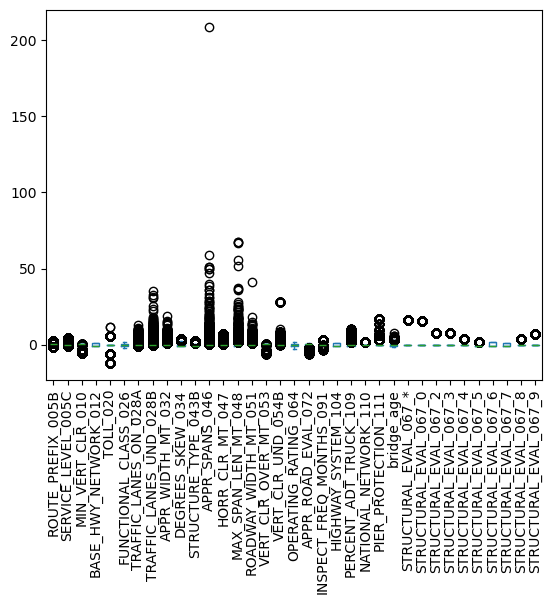

In [40]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X)

# Scale the data
X_scaled = pd.DataFrame(X_scaler.transform(X),columns=X.columns)

# Plotting data distributions after scaling
X_scaled.plot(kind='box', showfliers=True, rot=90)
plt.show()

In [41]:
# Define threshold for outliers
threshold = 10

# Create boolean mask for outliers
outlier_mask = abs(X_scaled) > threshold

# Count the number of outliers along each column (axis=0)
outlier_counts = outlier_mask.sum(axis=0)

print("Number of outliers in each column:")
print(outlier_counts)

Number of outliers in each column:
ROUTE_PREFIX_005B            0
SERVICE_LEVEL_005C           0
MIN_VERT_CLR_010             0
BASE_HWY_NETWORK_012         0
TOLL_020                   127
FUNCTIONAL_CLASS_026         0
TRAFFIC_LANES_ON_028A        5
TRAFFIC_LANES_UND_028B      59
APPR_WIDTH_MT_032           11
DEGREES_SKEW_034             0
STRUCTURE_TYPE_043B          0
APPR_SPANS_046              83
HORR_CLR_MT_047              0
MAX_SPAN_LEN_MT_048         58
STRUCTURE_LEN_MT_049       127
ROADWAY_WIDTH_MT_051        11
VERT_CLR_OVER_MT_053         0
VERT_CLR_UND_054B           60
OPERATING_RATING_064         0
APPR_ROAD_EVAL_072           0
INSPECT_FREQ_MONTHS_091      0
HIGHWAY_SYSTEM_104           0
PERCENT_ADT_TRUCK_109       13
NATIONAL_NETWORK_110         0
PIER_PROTECTION_111        146
bridge_age                   0
STRUCTURE_LEN_MT_049       127
STRUCTURAL_EVAL_067_*      368
STRUCTURAL_EVAL_067_0      410
STRUCTURAL_EVAL_067_2        0
STRUCTURAL_EVAL_067_3        0
STRU

In [42]:
# Filter out rows containing outliers
mask = X_scaled[abs((X_scaled))> threshold].any(axis=1)
X_scaled_clean= X_scaled[~mask]
y_clean = y[~mask]

# number of row eliminated in the original dataset
print('number of row eliminated in the original dataset')
len(X_scaled) - len(X_scaled_clean)

number of row eliminated in the original dataset


1299

## LogisticRegression model

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Assuming X is your features DataFrame and y is your target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_clean, y_clean, test_size=0.2, random_state=42)

# Create a pipeline with StandardScaler and Logistic Regression
pipeline = Pipeline([
    ('model', LogisticRegression(max_iter=1000))
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the training and testing data
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Calculate classification report for training data
print("Classification Report for Training Data:")
print(classification_report(y_train, y_train_pred))

# Calculate classification report for testing data
print("\nClassification Report for Testing Data:")
print(classification_report(y_test, y_test_pred))

Classification Report for Training Data:
              precision    recall  f1-score   support

           F       0.84      0.86      0.85     39155
           G       0.87      0.85      0.86     33070
           P       0.68      0.61      0.65      5263

    accuracy                           0.84     77488
   macro avg       0.80      0.77      0.78     77488
weighted avg       0.84      0.84      0.84     77488


Classification Report for Testing Data:
              precision    recall  f1-score   support

           F       0.84      0.86      0.85      9775
           G       0.86      0.85      0.86      8321
           P       0.68      0.62      0.65      1276

    accuracy                           0.84     19372
   macro avg       0.79      0.78      0.78     19372
weighted avg       0.84      0.84      0.84     19372



In [44]:
# Visualization of the most important features
# final_model = pipeline.steps[-1][1]
# coefficients = final_model.coef_[0]

# feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
# feature_importance = feature_importance.sort_values('Importance', ascending=True)
# feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 12))
# plt.show()

## CatBoostClassifier model

In [45]:
from catboost import CatBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Assuming X is your features DataFrame and y is your target variable


# Calculate class weights based on class frequencies
unique_classes, class_counts = np.unique(y_train, return_counts=True)
class_weights = dict(zip(unique_classes, 1 / class_counts))

# Create a CatBoostClassifier with parameters
catboost_params = {
    'l2_leaf_reg': .2,
    'border_count': 32,
    'iterations': 100,
    'class_weights': class_weights,
    'random_state': 42,
    'learning_rate':.1,
    'depth':2,
    'loss_function':'MultiClass'
}

# Create a pipeline with StandardScaler and CatBoostClassifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', CatBoostClassifier(**catboost_params))
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the training and testing data
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Calculate classification report for training data
print("Classification Report for Training Data:")
print(classification_report(y_train, y_train_pred))

# Calculate classification report for testing data
print("\nClassification Report for Testing Data:")
print(classification_report(y_test, y_test_pred))

0:	learn: 1.0319830	total: 12.1ms	remaining: 1.2s
1:	learn: 0.9814015	total: 25.6ms	remaining: 1.25s
2:	learn: 0.9418245	total: 39.7ms	remaining: 1.28s
3:	learn: 0.9072769	total: 53.3ms	remaining: 1.28s
4:	learn: 0.8771204	total: 65.9ms	remaining: 1.25s
5:	learn: 0.8487259	total: 79.3ms	remaining: 1.24s
6:	learn: 0.8254033	total: 91.5ms	remaining: 1.22s
7:	learn: 0.8010834	total: 105ms	remaining: 1.21s
8:	learn: 0.7809680	total: 120ms	remaining: 1.21s
9:	learn: 0.7636948	total: 132ms	remaining: 1.18s
10:	learn: 0.7456848	total: 145ms	remaining: 1.17s
11:	learn: 0.7310195	total: 158ms	remaining: 1.16s
12:	learn: 0.7183007	total: 170ms	remaining: 1.14s
13:	learn: 0.7054619	total: 183ms	remaining: 1.13s
14:	learn: 0.6946231	total: 196ms	remaining: 1.11s
15:	learn: 0.6841155	total: 209ms	remaining: 1.1s
16:	learn: 0.6728619	total: 226ms	remaining: 1.1s
17:	learn: 0.6640574	total: 243ms	remaining: 1.11s
18:	learn: 0.6552782	total: 258ms	remaining: 1.1s
19:	learn: 0.6486671	total: 272ms	rema

## Multi-layer Perceptron classifier model

In [46]:
from sklearn.neural_network import MLPClassifier

# Create a pipeline with StandardScaler and MLPClassifier
pipeline = Pipeline([
    ('model', MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', 
                            alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, 
                            max_iter=1000, shuffle=True, random_state=None, tol=0.0001,validation_fraction=0.2))
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the training and testing data
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Calculate classification report for training data
print("Classification Report for Training Data:")
print(classification_report(y_train, y_train_pred))

# Calculate classification report for testing data
print("\nClassification Report for Testing Data:")
print(classification_report(y_test, y_test_pred))

Classification Report for Training Data:
              precision    recall  f1-score   support

           F       0.88      0.87      0.87     39155
           G       0.87      0.89      0.88     33070
           P       0.79      0.69      0.74      5263

    accuracy                           0.87     77488
   macro avg       0.85      0.82      0.83     77488
weighted avg       0.87      0.87      0.87     77488


Classification Report for Testing Data:
              precision    recall  f1-score   support

           F       0.86      0.85      0.85      9775
           G       0.85      0.88      0.86      8321
           P       0.74      0.65      0.69      1276

    accuracy                           0.85     19372
   macro avg       0.82      0.79      0.80     19372
weighted avg       0.85      0.85      0.85     19372



## Testing the MLP model with bridges in different states

In [47]:
bridge_df_test = pd.read_csv("Resources/bridge_testing_dataset.csv", low_memory=False)
bridge_df_test.shape

(621579, 73)

In [48]:
# Selecting AZ and TX states
bridge_AZTX_df = bridge_df_test.loc[(bridge_df_test['STATE_CODE_001'] == 4) | (bridge_df_test['STATE_CODE_001'] == 48),:]
bridge_AZTX_df.head()

,OBJECTID,STATE_CODE_001,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,FEATURES_DESC_006A,MIN_VERT_CLR_010,BASE_HWY_NETWORK_012,TOLL_020,FUNCTIONAL_CLASS_026,TRAFFIC_LANES_ON_028A,TRAFFIC_LANES_UND_028B,ADT_029,DESIGN_LOAD_031,APPR_WIDTH_MT_032,DEGREES_SKEW_034,STRUCTURE_FLARED_035,RAILINGS_036A,TRANSITIONS_036B,NAVIGATION_038,NAV_VERT_CLR_MT_039,NAV_HORR_CLR_MT_040,STRUCTURE_TYPE_043B,MAIN_UNIT_SPANS_045,APPR_SPANS_046,HORR_CLR_MT_047,MAX_SPAN_LEN_MT_048,STRUCTURE_LEN_MT_049,ROADWAY_WIDTH_MT_051,DECK_WIDTH_MT_052,VERT_CLR_OVER_MT_053,VERT_CLR_UND_REF_054A,VERT_CLR_UND_054B,DECK_COND_058,SUPERSTRUCTURE_COND_059,SUBSTRUCTURE_COND_060,CHANNEL_COND_061,CULVERT_COND_062,OPERATING_RATING_064,STRUCTURAL_EVAL_067,DECK_GEOMETRY_EVAL_068,UNDCLRENCE_EVAL_069,WATERWAY_EVAL_071,APPR_ROAD_EVAL_072,IMP_LEN_MT_076,DATE_OF_INSPECT_090,INSPECT_FREQ_MONTHS_091,FRACTURE_092A,UNDWATER_LOOK_SEE_092B,SPEC_INSPECT_092C,BRIDGE_IMP_COST_094,ROADWAY_IMP_COST_095,TOTAL_IMP_COST_096,STRAHNET_HIGHWAY_100,PARALLEL_STRUCTURE_101,HIGHWAY_SYSTEM_104,DECK_STRUCTURE_TYPE_107,SURFACE_TYPE_108A,MEMBRANE_TYPE_108B,DECK_PROTECTION_108C,PERCENT_ADT_TRUCK_109,NATIONAL_NETWORK_110,PIER_PROTECTION_111,BRIDGE_LEN_IND_112,SCOUR_CRITICAL_113,FUTURE_ADT_114,MIN_NAV_CLR_MT_116,FED_AGENCY,BRIDGE_CONDITION,LOWEST_RATING,DECK_AREA,DATE,bridge_age,future_adt_estimation
17851,17852,4,6,0,creek,99.99,0.0,3,9,1,0,30,C,6.1,0,0,0,0,0,0.0,0.0,10,1,0,4.6,27.4,28.0,4.6,5.1,99.99,N,0.00,7,7,7,8,N,47.0,7,7,N,8,6.0,0.0,1221,24,Y24,N,N,0.0,0.0,0.0,0,N,0,3,3,0,3,0.0,0,0.0,Y,8,30,0.0,Y,G,7,142.80,723,82,20.0
17852,17853,4,6,8,creek,99.99,0.0,3,9,1,0,30,0,3.8,0,0,0,N,0,0.0,0.0,3,1,0,3.8,16.6,16.6,16.6,16.6,99.99,N,0.00,5,7,6,N,N,0.0,*,9,N,N,6.0,0.0,1221,24,Y24,N,N,0.0,0.0,0.0,0,N,0,1,0,0,0,0.0,1,0.0,Y,N,30,0.0,Y,F,5,275.56,723,82,19.0
17853,17854,4,6,8,river,99.99,0.0,3,6,2,4,30,6,6.1,0,0,1,1,0,0.0,0.0,2,8,0,6.1,21.3,169.8,6.1,7.0,99.99,H,0.34,7,7,7,8,N,62.9,7,5,3,9,8.0,0.0,921,24,N,Y60,N,0.0,0.0,0.0,0,N,0,1,0,0,0,0.0,0,0.0,Y,5,75,0.0,Y,G,7,1188.60,723,13,22.0
17854,17855,4,4,1,road,99.99,0.0,3,9,2,0,200,5,9.1,14,0,1,1,0,0.0,0.0,5,4,0,9.1,14.0,56.1,9.1,10.1,99.99,N,0.00,7,7,7,8,N,86.0,7,6,N,9,8.0,0.0,921,24,N,N,N,0.0,0.0,754.0,0,N,0,1,0,0,0,75.0,0,0.0,Y,8,500,0.0,Y,G,7,566.61,723,5,22.0
17855,17856,4,3,1,canal,99.99,0.0,3,6,2,0,200,5,12.8,35,0,1,0,0,0.0,0.0,2,1,0,12.8,33.5,34.2,12.8,13.6,99.99,N,0.00,6,7,7,8,N,66.4,7,9,N,9,8.0,0.0,921,24,N,N,N,0.0,0.0,0.0,0,N,0,1,0,0,0,0.0,0,0.0,Y,5,500,0.0,Y,F,6,465.12,723,46,22.0


In [49]:
df_AT_filtered = bridge_AZTX_df[['ROUTE_PREFIX_005B', 'SERVICE_LEVEL_005C',
       'MIN_VERT_CLR_010', 'BASE_HWY_NETWORK_012', 'TOLL_020',
       'FUNCTIONAL_CLASS_026', 
       'TRAFFIC_LANES_ON_028A','TRAFFIC_LANES_UND_028B', 
       # 'ADT_029', 
       'APPR_WIDTH_MT_032',
       'DEGREES_SKEW_034', #'STRUCTURE_FLARED_035', 
       #'NAV_VERT_CLR_MT_039','NAV_HORR_CLR_MT_040', 
       'STRUCTURE_TYPE_043B', #'MAIN_UNIT_SPANS_045',
       'APPR_SPANS_046', 
       'HORR_CLR_MT_047', 
       'MAX_SPAN_LEN_MT_048','STRUCTURE_LEN_MT_049', 'ROADWAY_WIDTH_MT_051', 
       'VERT_CLR_OVER_MT_053','VERT_CLR_UND_054B', 'OPERATING_RATING_064', 
       'APPR_ROAD_EVAL_072',
       #'IMP_LEN_MT_076', 
       #'DATE_OF_INSPECT_090', 
       'INSPECT_FREQ_MONTHS_091',
       #'BRIDGE_IMP_COST_094', #'ROADWAY_IMP_COST_095', 
       #'STRAHNET_HIGHWAY_100',
       'HIGHWAY_SYSTEM_104', 'PERCENT_ADT_TRUCK_109', 'NATIONAL_NETWORK_110',
       'PIER_PROTECTION_111', #'MIN_NAV_CLR_MT_116', 
       #'LOWEST_RATING', 
       #'DATE',
       'bridge_age',
       'STRUCTURE_LEN_MT_049',
       # 'FEATURES_DESC_006A', 'DESIGN_LOAD_031',
       'STRUCTURAL_EVAL_067',
       ]]

In [50]:
X_at = df_AT_filtered
y_at = bridge_AZTX_df['BRIDGE_CONDITION'].ravel()

In [51]:
X_at = pd.get_dummies(X_at)

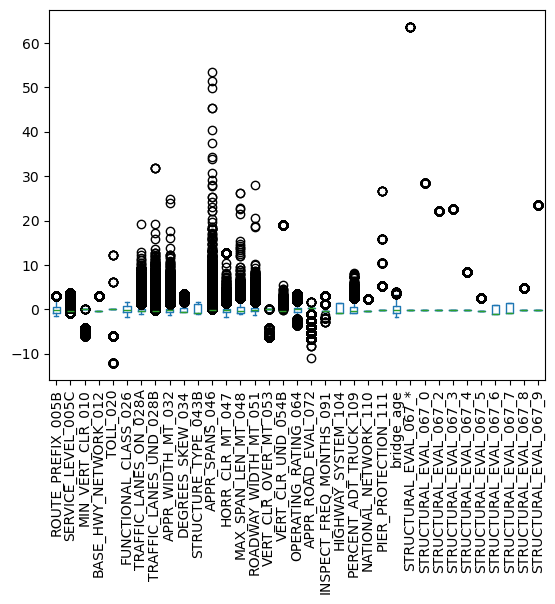

In [52]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_at)

# Scale the data
X_scaled = pd.DataFrame(X_scaler.transform(X_at),columns=X_at.columns)

X_scaled.plot(kind='box', showfliers=True, rot=90)
plt.show()

In [53]:
# Define threshold for outliers (e.g., values greater than 10)
threshold = 10

# Create boolean mask for outliers
outlier_mask = abs(X_scaled) > threshold

# Count the number of outliers along each column (axis=0)
outlier_counts = outlier_mask.sum(axis=0)

print("Number of outliers in each column:")
print(outlier_counts)

Number of outliers in each column:
ROUTE_PREFIX_005B            0
SERVICE_LEVEL_005C           0
MIN_VERT_CLR_010             0
BASE_HWY_NETWORK_012         0
TOLL_020                    67
FUNCTIONAL_CLASS_026         0
TRAFFIC_LANES_ON_028A        8
TRAFFIC_LANES_UND_028B      39
APPR_WIDTH_MT_032           17
DEGREES_SKEW_034             0
STRUCTURE_TYPE_043B          0
APPR_SPANS_046             105
HORR_CLR_MT_047            194
MAX_SPAN_LEN_MT_048         15
STRUCTURE_LEN_MT_049       104
ROADWAY_WIDTH_MT_051         5
VERT_CLR_OVER_MT_053         0
VERT_CLR_UND_054B          149
OPERATING_RATING_064         0
APPR_ROAD_EVAL_072           1
INSPECT_FREQ_MONTHS_091      0
HIGHWAY_SYSTEM_104           0
PERCENT_ADT_TRUCK_109        0
NATIONAL_NETWORK_110         0
PIER_PROTECTION_111         76
bridge_age                   0
STRUCTURE_LEN_MT_049       104
STRUCTURAL_EVAL_067_*       16
STRUCTURAL_EVAL_067_0       80
STRUCTURAL_EVAL_067_2      131
STRUCTURAL_EVAL_067_3      127
STRU

In [54]:
# Filter out rows containing outliers
mask = X_scaled[abs((X_scaled))> threshold].any(axis=1)
X_scaled_clean= X_scaled[~mask]
y_clean = y_at[~mask]

# number of row eliminated in the original dataset
print('number of row eliminated in the original dataset')
len(X_scaled) - len(X_scaled_clean)

number of row eliminated in the original dataset


1107

In [55]:
# Model
final_model = pipeline.steps[-1][1]
final_model

MLPClassifier(max_iter=1000, validation_fraction=0.2)

In [56]:
# Make predictions on the AZ and TX data
y_train_pred_AZTX = pipeline.predict(X_scaled_clean)

# Calculate classification report for training data
print("Classification Report for Training Data:")
print(classification_report(y_clean, y_train_pred_AZTX))



Classification Report for Training Data:
              precision    recall  f1-score   support

           F       0.75      0.82      0.78     29477
           G       0.84      0.76      0.80     33663
           P       0.53      0.88      0.66       610

    accuracy                           0.79     63750
   macro avg       0.71      0.82      0.75     63750
weighted avg       0.79      0.79      0.79     63750

